#### Recap

For equality-constrained problem

$$\begin{align*}
\min\,\,\, & f(x) \\
\text{s.t. }\,\,\, & Ax= b \\
\end{align*}$$

write out the Lagrangian

$$L(x, \nu)=f(x)+\nu^T(Ax-b)$$

we can do dual (sub)gradient method by starting with some initial $\nu^0$ and repeating

$$\begin{align*}
x^{k+1} &\in \arg \min_x L(x, \nu^k)\\
\nu^{k+1} &= \nu^k+t_k(Ax^{k+1}-b)
\end{align*}$$

The potential issue is that convergence requires stringent assumptions (such as strong convexity of $f$), and these iterates alone may not even ensure primal feasibility

#### Augmented Lagrangian method

Augmented Lagrangian method (aka method of multipliers) modifies the problem, for $\rho>0$

$$\begin{align*}
\min\,\,\, & f(x)+\frac{\rho}{2}\|Ax-b\|_2^2 \\
\text{s.t. }\,\,\, & Ax= b \\
\end{align*}$$

Using a modified Lagrangian

$$L_{\rho}(x, \nu)=f(x)+\nu^T(Ax-b)+\frac{\rho}{2}\|Ax-b\|_2^2$$

we get the iterates

$$\begin{align*}
x^{k+1} &\in \arg \min_x L_{\rho}(x, \nu^k)\\
\nu^{k+1} &= \nu^k+\rho(Ax^{k+1}-b)
\end{align*}$$

Choice of $\rho$ reflects preference
* too large: not enough emphasis on minimizing $f$
* too small: not enough emphasis on primal feasibility

Notice the step size choice $t_k=\rho$

Since $x^{k+1}$ minimizes $f(x)+\left(\nu^k\right)^TAx+(\rho/2)\|Ax-b\|_2^2$ over $x$, we have

$$\begin{align*}
0&\in \partial f(x^{k+1})+A^T\left(\nu^k+\rho(Ax^{k+1}-b)\right) \\
&=\partial f(x^{k+1})+A^T\nu^{k+1}
\end{align*}$$

This is the `stationary condition` for the primal problem, so the KKT conditions are satisfied in the limit

Therefore, it helps primal convergence under weaker assumptions

However, we lose decomposability when $f$ is decomposable, since the Lagrangian is no longer trivially decomposable (due to the augmented term $\rho/2\|Ax-b\|_2^2$)

#### Alternating direction method of multipliers (ADMM)

ADMM tries to `force` the decomposability on top of augmented Lagrangian method

For the problem

$$\min_{x,z} f(x)+g(z), \text{s.t. } Ax+Bz=c$$

define augmented Lagrangian with $\rho>0$

$$L_{\rho}(x, z, \nu)=f(x)+g(z)+\nu^T(Ax+Bz-c)+\frac{\rho}{2}\|Ax+Bz-c\|_2^2$$

Instead of jointly optimizing primal variables $x, z$, ADMM repeats

$$\begin{align*}
x^{k+1}&=\arg \min_x L_{\rho}(x, z^k, \nu^k) \\
z^{k+1}&=\arg \min_z L_{\rho}(x^{k+1}, z, \nu^k) \\
\nu^{k+1}&=\nu^k+\rho(Ax^{k+1}+Bz^{k+1}-c) \\
\end{align*}$$

Under modest assumptions on $f, g$ (e.g., closed and convex), ADMM iterates satisfy residual, primal and dual convergence

#### Scaled form ADMM

If we denote $w=\nu/\rho$, we can rewrite the augmented Lagrangian as

$$L_{\rho}(x, z, w)=f(x)+g(z)+\frac{\rho}{2}\|Ax+Bz-c+w\|_2^2-\frac{\rho}{2}\|w\|_2^2$$

and rewrite ADMM iterates as

$$\begin{align*}
x^{k+1}&=\arg \min_x f(x)+\frac{\rho}{2}\|Ax+Bz^{k}-c+w^k\|_2^2 \\
z^{k+1}&=\arg \min_z g(z)+\frac{\rho}{2}\|Ax^{k+1}+Bz-c+w^k\|_2^2 \\
w^{k+1}&=w^k+Ax^{k+1}+Bz^{k+1}-c \\
\end{align*}$$

where the kth iterate $w^k$ is a running sum of residuals

$$w^k=w^0+\sum_{i=1}^k(Ax^i+Bz^i-c)$$

#### Connection to proximal operators

We can see that $x^{k+1}$ and $z^{k+1}$ are basically `proximal` operators

If we consider

$$\min_x f(x)+g(x) \Longleftrightarrow \min_{x,z} f(x)+g(z), \text{s.t. } x=z$$

we can rewrite ADMM steps as

$$\begin{align*}
x^{k+1}&=\text{prox}_{f, 1/\rho}(z^k-w^k)\\
z^{k+1}&=\text{prox}_{g, 1/\rho}(x^{k+1}+w^k)\\
w^{k+1}&=w^k+x^{k+1}-z^{k+1}
\end{align*}$$

#### LASSO example

Recall the LASSO problem

$$\min_x \frac{1}{2}\|y-Ax\|_2^2+\lambda \|x\|_1$$

which is equivalent to

$$\min_{x, z} \frac{1}{2}\|y-Ax\|_2^2+\lambda \|z\|_1, \text{s.t. } x=z$$

Denote the first part $f$ and the second part $g$, and $h=f+g$

Now, we can write out ADMM for LASSO explicitly

$$\begin{align*}
x^{k+1}&=\text{prox}_{f, 1/\rho}(z^k-w^k) \\
&=\arg \min_x \frac{1}{2(1/\rho)}\|x-z^k+w^k\|_2^2+\frac{1}{2}\|y-Ax\|_2^2\\
&\text{take derivative w.r.t. x and set to zero}\\
&(\rho I+A^TA)x=\rho(z^k-w^k)+A^Ty\\
&=(\rho I+A^TA)^{-1}\left(\rho(z^k-w^k)+A^Ty\right)
&\text{ }\\
&\text{ }\\
z^{k+1}&=\text{prox}_{g, 1/\rho}(x^{k+1}+w^k)\\
&=S_{\lambda, 1/\rho}(x^{k+1}+w^k)\\
&\text{ }\\
w^{k+1}&=w^k+x^{k+1}-z^{k+1}
\end{align*}$$

For LASSO, ADMM steps are “almost” like repeated soft-thresholding of ridge regression coefficients

##### Comparison to subgradient, ISTA and FISTA

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cvxpy as cp
import time
np.set_printoptions(formatter={'float': '{: 0.4f}'.format})

plt.style.use('dark_background')
# color: https://matplotlib.org/stable/gallery/color/named_colors.htm

In [2]:
def cholesky_factorization(A):
    m = A.shape[0]
    l_mat = A.copy().astype(float)

    for k in range(m):
        if l_mat[k, k] <= 0:
            raise ValueError('Matrix is not positive definite')

        # Follow the first step, iteratively apply to a smaller and smaller K
        l_mat[k+1:, k+1:] -= np.outer(l_mat[k+1:, k], l_mat[k+1:, k]) / l_mat[k, k]
        l_mat[k:, k] /= np.sqrt(l_mat[k, k])

    return np.tril(l_mat)

def forward_substitution(L, b):
    m, n = L.shape
    x = np.zeros(n)
    for i in range(n):
        x[i] = (b[i] - np.dot(L[i, :i], x[:i])) / L[i, i]
    return x

def back_substitution(R, b):
    m, n = R.shape
    x = np.zeros(n)
    for i in range(n - 1, -1, -1):
        x[i] = (b[i] - np.dot(R[i, i + 1:], x[i + 1:])) / R[i, i]
    return x

In [3]:
def subgrad_l1_ls(A, b, x1, lamb=0.5, a=1e-2, tol=1e-3, n_iter=3000):
    # l1-regularized least squares

    h = [np.inf]
    h_best = [np.inf]
    x = x1.copy()

    for k in range(1, n_iter+1):
        subgrad = A.T @ (A @ x - b) + lamb * np.sign(x)
        h_val = 0.5 * np.linalg.norm(A @ x - b)**2 + lamb * np.linalg.norm(x, ord=1)

        # Step size
        alpha = a / np.sqrt(k)

        h.append(h_val)
        h_best.append(min(h_val, h_best[-1]))

        # Subgradient step
        x = x - alpha * subgrad

    hist = {'h': h, 'h_best': h_best}

    return x, hist

In [4]:
def prox_l1(x, lamb, t):
    # proximal operator on l1 norm
    return np.sign(x) * np.maximum(np.abs(x) - t * lamb, 0)

def h(x, A, b, lamb):
    return 0.5 * np.linalg.norm(A @ x - b)**2 + lamb * np.linalg.norm(x, ord=1)

def f(x, A, b):
    return 0.5 * np.linalg.norm(A @ x - b)**2

def ista_l1_ls(A, b, x1, lamb=0.5, tol=1e-8, n_iter=3000, min=min):
    h_hist = [np.inf]
    x = x1.copy()
    beta = 0.5
    t = 1

    for k in range(1, n_iter+1):
        z = prox_l1(x - t * A.T @ (A @ x - b), lamb, t)
        # backtracking line search
        while f(z, A, b) > f(x, A, b) + A.T @ (A @ x - b) @ (z - x) + 0.5 * np.linalg.norm(z - x)**2 / t:
            t *= beta
            z = prox_l1(x - t * A.T @ (A @ x - b), lamb, t)
        x = z
        h_hist.append(h(x, A, b, lamb))
        if abs(h_hist[-1] - min) < tol:
            break

    hist = {'h': h_hist}

    return x, hist

def fista_l1_ls(A, b, x1, lamb=0.5, tol=1e-8, n_iter=3000,min=min):
    h_hist = [np.inf]
    x = x1.copy()
    beta = 0.5
    t = 1
    x_prev = x1.copy()
    for k in range(1, n_iter+1):
        v = x + (k-1) / (k+2) * (x - x_prev)
        z = prox_l1(v - t * A.T @ (A @ v - b), lamb, t)
        # backtracking line search
        while f(z, A, b) > f(v, A, b) + A.T @ (A @ v - b) @ (z - v) + 0.5 * np.linalg.norm(z - v)**2 / t:
            t *= beta
            z = prox_l1(v - t * A.T @ (A @ v - b), lamb, t)
        x_prev = x
        x = z
        h_hist.append(h(x, A, b, lamb))
        if abs(h_hist[-1] - min) < tol:
            break

    hist = {'h': h_hist}

    return x, hist

def admm_l1_ls(A, b, x1, lamb=0.5, tol=1e-8, n_iter=3000, min=min):
    rho = 1/lamb
    h_hist = [np.inf]
    x = x1.copy()
    z = x1.copy()
    w = np.zeros_like(x)
    try:
        # L = np.linalg.cholesky(A.T @ A + rho * np.eye(A.shape[1]))
        L = cholesky_factorization(A.T @ A + rho * np.eye(A.shape[1]))
    except ValueError:
        raise ValueError('Matrix is not positive definite')

    for k in range(1, n_iter+1):
        y = forward_substitution(L, A.T @ b + rho * (z - w))
        x = back_substitution(L.T, y)
        z = prox_l1(x + w, lamb, 1/rho)
        w = w + x - z
        h_hist.append(h(x, A, b, lamb))
        if abs(h_hist[-1] - min) < tol:
            break

    hist = {'h': h_hist}

    return x, hist

In [5]:
np.random.seed(42)
n = 1000  # size of x, overdetermined system
m = 500
lamb = 0.5
A = np.random.randn(m, n)
b = np.random.randn(m)

# Get optimal value using CVXPY
x_var = cp.Variable(n)
objective = cp.Minimize(0.5 * cp.norm(A @ x_var - b)**2 + lamb * cp.norm(x_var, 1))
problem = cp.Problem(objective)
problem.solve()

h_min = problem.value

Optimal value (CVXPY) 10.2022

Optimal h (subgrad): 12.0101
time: 8.2377s

Optimal h (ista): 10.2036
time: 13.3801s

Optimal h (fista): 10.2022
time: 10.0315s

Optimal h (admm): 10.2022
time: 57.9812s


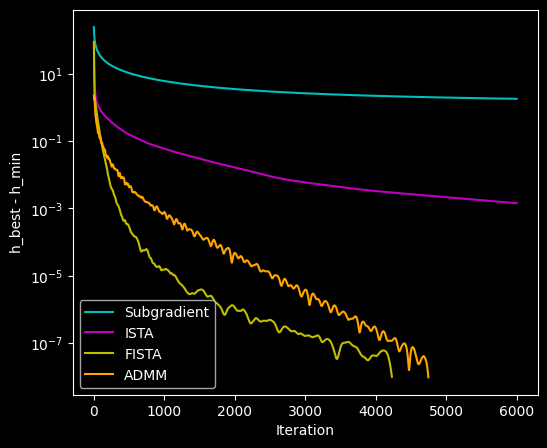

In [6]:
x1 = np.zeros(n)
Rtrue = np.linalg.norm(x1 - x_var.value)
print(f"Optimal value (CVXPY) {h_min:.4f}")
tol = 1e-8
n_iter = 6000

fig, ax = plt.subplots(figsize=(6, 5))

start_time = time.time()
x_subgrad, hist_subgrad = subgrad_l1_ls(A, b, x1, lamb=lamb, a=1e-4, tol=tol, n_iter=n_iter)
print(f"\nOptimal h (subgrad): {hist_subgrad['h_best'][-1]:.4f}")
print(f"time: {time.time() - start_time:.4f}s")

start_time = time.time()
x_ista, hist_ista = ista_l1_ls(A, b, x1, lamb=lamb, tol=tol, n_iter=n_iter, min=h_min)
print(f"\nOptimal h (ista): {hist_ista['h'][-1]:.4f}")
print(f"time: {time.time() - start_time:.4f}s")

start_time = time.time()
x_fista, hist_fista = fista_l1_ls(A, b, x1, lamb=lamb, tol=tol, n_iter=n_iter, min=h_min)
print(f"\nOptimal h (fista): {hist_fista['h'][-1]:.4f}")
print(f"time: {time.time() - start_time:.4f}s")

start_time = time.time()
x_admm, hist_admm = admm_l1_ls(A, b, x1, lamb=lamb, tol=tol, n_iter=n_iter, min=h_min)
print(f"\nOptimal h (admm): {hist_admm['h'][-1]:.4f}")
print(f"time: {time.time() - start_time:.4f}s")

ax.semilogy(np.arange(1, len(hist_subgrad['h_best'])), np.array(hist_subgrad['h_best'][1:]) - h_min, 'c-', label="Subgradient")
ax.semilogy(np.arange(1, len(hist_ista['h'])), np.array(hist_ista['h'][1:]) - h_min, 'm-', label="ISTA")
ax.semilogy(np.arange(1, len(hist_fista['h'])), np.array(hist_fista['h'][1:]) - h_min, 'y-', label="FISTA")
ax.semilogy(np.arange(1, len(hist_admm['h'])), np.array(hist_admm['h'][1:]) - h_min, '-', label="ADMM", c='orange')
ax.set_xlabel('Iteration')
ax.set_ylabel('h_best - h_min')
ax.legend()

plt.show()